<a href="https://colab.research.google.com/github/Robinhood05/Medicine_Recommendation/blob/main/Medicine_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import  pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

# List all files and folders in "My Drive"

# Then check inside Dataset folder
print(os.listdir('/content/drive/My Drive/Dataset'))


['Training.csv']


In [ ]:
import pandas as pd

training_dataset = pd.read_csv('/content/drive/My Drive/Dataset/Training.csv')
print(training_dataset.head())


   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             

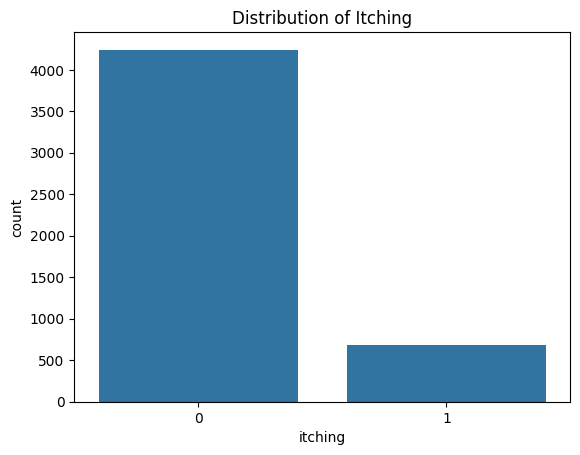

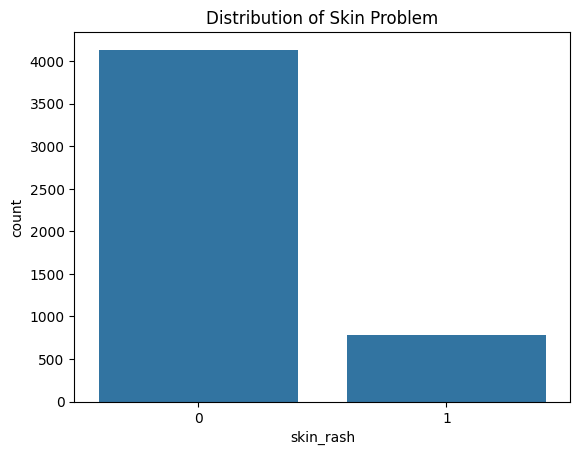

In [ ]:
sns.countplot(x='itching', data=training_dataset)
plt.title('Distribution of Itching')
plt.show()
sns.countplot(x='skin_rash', data=training_dataset)
plt.title('Distribution of Skin Problem')
plt.show()

In [ ]:
training_dataset.isnull()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4916,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4917,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4918,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
sns.pairplot(training_dataset)
plt.show()


To impute numerical features using the average of previous and next values:

In [ ]:
for column in training_dataset.columns:
    if training_dataset[column].isnull().sum() > 0:
        training_dataset[column] = training_dataset[column].interpolate(method='linear', limit_direction='both')


In [ ]:
training_dataset['prognosis'] = training_dataset['prognosis'].fillna(method='ffill')


<ipython-input-8-20ebfdba56ff>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  training_dataset['prognosis'] = training_dataset['prognosis'].fillna(method='ffill')


 Handle Categorical Values – Label Encoding

In [ ]:
X = training_dataset.drop('prognosis', axis=1)
y = training_dataset['prognosis']

# ecoding prognonsis
le = LabelEncoder()
le.fit(y)
Y = le.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


📌 5. Normalization – Min-Max Scaling


In [ ]:

scaler = MinMaxScaler()
features = training_dataset.drop('prognosis', axis=1)
scaled_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Concatenate back the target
preprocess_data = pd.concat([scaled_features, training_dataset['prognosis']], axis=1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


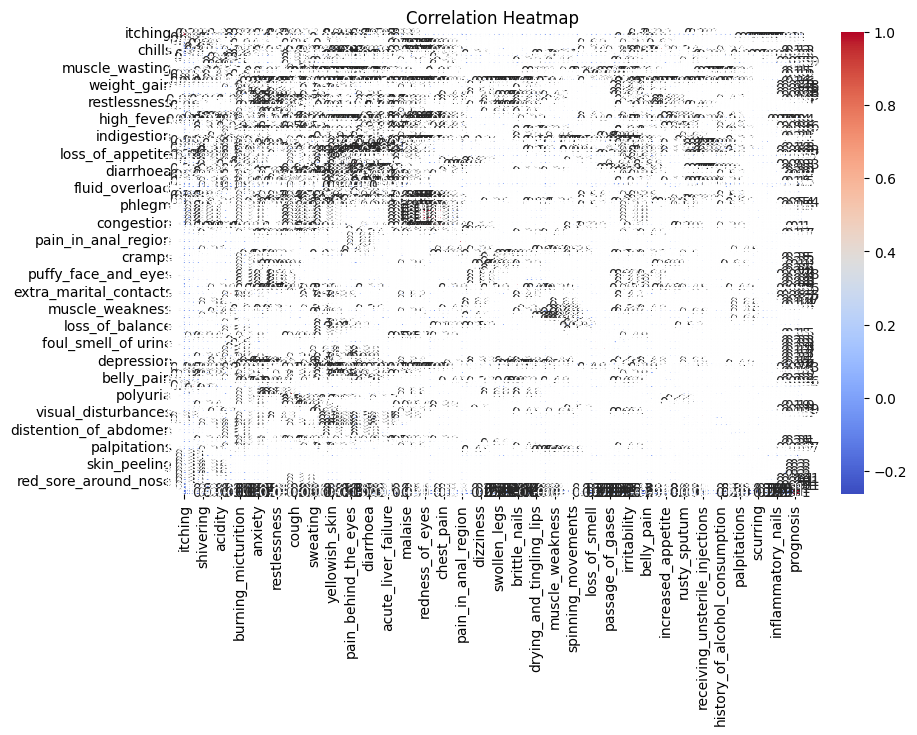

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add your target column (e.g., 'disease') back to the DataFrame
training_dataset['target'] = y  # if y is your label

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(training_dataset.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
importances = rf.feature_importances_

for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")


itching: 0.0158
skin_rash: 0.0081
nodal_skin_eruptions: 0.0074
continuous_sneezing: 0.0063
shivering: 0.0056
chills: 0.0100
joint_pain: 0.0119
stomach_pain: 0.0119
acidity: 0.0048
ulcers_on_tongue: 0.0060
muscle_wasting: 0.0090
vomiting: 0.0129
burning_micturition: 0.0070
spotting_ urination: 0.0087
fatigue: 0.0140
weight_gain: 0.0004
anxiety: 0.0025
cold_hands_and_feets: 0.0010
mood_swings: 0.0035
weight_loss: 0.0114
restlessness: 0.0040
lethargy: 0.0061
patches_in_throat: 0.0070
irregular_sugar_level: 0.0043
cough: 0.0096
high_fever: 0.0138
sunken_eyes: 0.0072
breathlessness: 0.0095
sweating: 0.0139
dehydration: 0.0083
indigestion: 0.0033
headache: 0.0111
yellowish_skin: 0.0084
dark_urine: 0.0137
nausea: 0.0137
loss_of_appetite: 0.0132
pain_behind_the_eyes: 0.0092
back_pain: 0.0078
constipation: 0.0047
abdominal_pain: 0.0117
diarrhoea: 0.0137
mild_fever: 0.0136
yellow_urine: 0.0026
yellowing_of_eyes: 0.0154
acute_liver_failure: 0.0039
fluid_overload: 0.0000
swelling_of_stomach: 0.004

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = X.corr().abs()

# Only keep upper triangle of the matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

print("Highly correlated features:", to_drop)

# Drop them
X_reduced = X.drop(columns=to_drop)


Highly correlated features: ['cold_hands_and_feets', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'pain_in_anal_region', 'bloody_stool', 'irritation_in_anus', 'bruising', 'swollen_legs', 'swollen_blood_vessels', 'puffy_face_and_eyes', 'enlarged_thyroid', 'brittle_nails', 'swollen_extremeties', 'drying_and_tingling_lips', 'slurred_speech', 'hip_joint_pain', 'unsteadiness', 'loss_of_smell', 'continuous_feel_of_urine', 'internal_itching', 'altered_sensorium', 'belly_pain', 'abnormal_menstruation', 'increased_appetite', 'polyuria', 'receiving_blood_transfusion', 'receiving_unsterile_injections', 'coma', 'stomach_bleeding', 'distention_of_abdomen', 'history_of_alcohol_consumption', 'fluid_overload.1', 'prominent_veins_on_calf', 'palpitations', 'painful_walking', 'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails', 'red_sore_around_nose', 'yellow_crust_ooze']


In [ ]:
unique_per_label = X.assign(label=y).drop_duplicates().groupby('label').size()
print(unique_per_label)


label
0      7
1      5
2      5
3      8
4      5
5      6
6      7
7      6
8     10
9      8
10     9
11    10
12     9
13     6
14     6
15     5
16     7
17     5
18     5
19     9
20     7
21    10
22     9
23     6
24     9
25     9
26     8
27     6
28     9
29     8
30    10
31     7
32     5
33     7
34     9
35     7
36     9
37     9
38     5
39     8
40     9
dtype: int64


In [ ]:
features = ['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering']
X_small = X[features]


In [ ]:
from sklearn.model_selection import train_test_split

# Correct split with stratification to balance classes
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [ ]:
import numpy as np

X_noisy = X.copy()
for col in X.columns:
    mask = np.random.rand(len(X)) < 0.05
    X_noisy[col] = (X_noisy[col] + mask.astype(int)) % 2  # Flip 0↔1

# Optionally add noise to labels too
y_noisy = y.copy()
mask = np.random.rand(len(y)) < 0.05
y_noisy[mask] = np.random.permutation(y_noisy[mask])


In [ ]:
models = {
    'SVC': SVC(kernel='linear'),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5)
}

# Loop through the models, train, test, and print results
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Test the model
    predictions = model.predict(X_test)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)
    print(f"{model_name} Confusion Matrix:")
    print(np.array2string(cm, separator=', '))

    print("\n" + "="*40 + "\n")

SVC Confusion Matrix:
[[24,  0,  0, ...,  0,  0,  0],
 [ 0, 24,  0, ...,  0,  0,  0],
 [ 0,  0, 24, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 24,  0,  0],
 [ 0,  0,  0, ...,  0, 24,  0],
 [ 0,  0,  0, ...,  0,  0, 24]]


RandomForest Confusion Matrix:
[[24,  0,  0, ...,  0,  0,  0],
 [ 0, 24,  0, ...,  0,  0,  0],
 [ 0,  0, 24, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 24,  0,  0],
 [ 0,  0,  0, ...,  0, 24,  0],
 [ 0,  0,  0, ...,  0,  0, 24]]


KNeighbors Confusion Matrix:
[[24,  0,  0, ...,  0,  0,  0],
 [ 0, 24,  0, ...,  0,  0,  0],
 [ 0,  0, 24, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 24,  0,  0],
 [ 0,  0,  0, ...,  0, 24,  0],
 [ 0,  0,  0, ...,  0,  0, 24]]




In [ ]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f"{name} Cross-Val Accuracy: {scores.mean():.4f}")


SVC Cross-Val Accuracy: 1.0000
RandomForest Cross-Val Accuracy: 1.0000
KNeighbors Cross-Val Accuracy: 1.0000


In [ ]:
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)


1.0

In [ ]:
import pickle
pickle.dump(svc,open('svc.pkl','wb'))

In [ ]:
from google.colab import files
files.download('svc.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
svc = pickle.load(open('svc.pkl','rb'))


In [ ]:

base_path = '/content/drive/My Drive/Dataset/'

sym_des = pd.read_csv(base_path + "symtoms_df.csv")
precautions = pd.read_csv(base_path + "precautions_df.csv")
workout = pd.read_csv(base_path + "workout_df.csv")
description = pd.read_csv(base_path + "description.csv")
medications = pd.read_csv(base_path + "medications.csv")
diets = pd.read_csv(base_path + "diets.csv")


In [ ]:
#==========================helper funtions================
def helper(dis):
    desc = description[description['Disease'] == predicted_disease]['Description']
    desc = " ".join([w for w in desc])

    pre = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]

    med = medications[medications['Disease'] == dis]['Medication']
    med = [med for med in med.values]

    die = diets[diets['Disease'] == dis]['Diet']
    die = [die for die in die.values]

    wrkout = workout[workout['disease'] == dis] ['workout']


    return desc,pre,med,die,wrkout

symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}

# Model Prediction function
def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        input_vector[symptoms_dict[item]] = 1
    return diseases_list[svc.predict([input_vector])[0]]

In [ ]:


# --- Disease Prediction Function ---
def predict_disease_from_symptoms(trained_model, input_symptoms, symptom_index_map, disease_name_map):
    """Predict disease based on a list of symptoms."""
    encoded_input = np.zeros(len(symptom_index_map), dtype=int)

    for symptom in input_symptoms:
        symptom_index = symptom_index_map.get(symptom)
        if symptom_index is not None:
            encoded_input[symptom_index] = 1
        else:
            print(f"Warning: Unknown symptom -> '{symptom}'")

    predicted_class_index = trained_model.predict([encoded_input])[0]
    predicted_disease_name = disease_name_map.get(predicted_class_index, "Unknown Disease")
    return predicted_disease_name

# --- Disease Information Retrieval ---
def get_detailed_disease_info(disease_name_str):
    """Fetch full disease info from associated dataframes."""

    # Description
    description_row = description[description['Disease'] == disease_name_str]
    disease_description = description_row['Description'].values[0] if not description_row.empty else "No description available."

    # Precautions
    precautions_row = precautions[precautions['Disease'] == disease_name_str]
    precaution_list = precautions_row[['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']].values.tolist()
    formatted_precautions = precaution_list[0] if precaution_list else ["No precautions found."]

    # Medications
    medication_list = medications[medications['Disease'] == disease_name_str]['Medication'].tolist()
    formatted_medications = medication_list if medication_list else ["No medications found."]

    # Diet
    diet_row_list = diets[diets['Disease'] == disease_name_str]['Diet'].tolist()
    formatted_diets = diet_row_list if diet_row_list else ["No diet information found."]

    # Workout
    workout_row = workout[workout['disease'] == disease_name_str]
    workout_recommendation = workout_row['workout'].values[0] if not workout_row.empty else "No workout suggestion available."

    return {
        "Disease Name": disease_name_str,
        "Description": disease_description,
        "Precautions": formatted_precautions,
        "Medications": formatted_medications,
        "Diet Suggestions": formatted_diets,
        "Workout Advice": workout_recommendation
    }


In [ ]:
import os

# Optional: clear terminal screen
os.system('cls' if os.name == 'nt' else 'clear')

# ANSI color codes for styling
HEADER = "\033[95m"
OKBLUE = "\033[94m"
OKGREEN = "\033[92m"
WARNING = "\033[93m"
FAIL = "\033[91m"
BOLD = "\033[1m"
UNDERLINE = "\033[4m"
ENDC = "\033[0m"

# Get symptoms from user
symptoms = input(f"{BOLD}{OKBLUE}Enter your symptoms (comma-separated): {ENDC}")
user_symptoms = [s.strip("[]' ") for s in symptoms.split(',')]

# Prediction (assuming function definitions exist)
predicted_disease = get_predicted_value(user_symptoms)
desc, pre, med, die, wrkout = helper(predicted_disease)

# Output formatting
print(f"\n{BOLD}{HEADER}========== DISEASE PREDICTION RESULT =========={ENDC}")
print(f"{BOLD}Predicted Disease: {OKGREEN}{predicted_disease}{ENDC}")

print(f"\n{BOLD}{HEADER}=============== DESCRIPTION ===================={ENDC}")
print(f"{desc}")

print(f"\n{BOLD}{HEADER}=============== PRECAUTIONS ===================={ENDC}")
for i, p_i in enumerate(pre[0], 1):
    print(f"{i}. {p_i}")

print(f"\n{BOLD}{HEADER}=============== MEDICATIONS ===================={ENDC}")
for i, m_i in enumerate(med, 1):
    print(f"{i}. {m_i}")

print(f"\n{BOLD}{HEADER}=============== WORKOUT ========================{ENDC}")
for i, w_i in enumerate(wrkout, 1):
    print(f"{i}. {w_i}")

print(f"\n{BOLD}{HEADER}=============== DIET ============================{ENDC}")
for i, d_i in enumerate(die, 1):
    print(f"{i}. {d_i}")

print(f"\n{BOLD}{OKBLUE}Stay safe and follow the recommended steps!{ENDC}")


Enter your symptoms (comma-separated): itching

========== DISEASE PREDICTION RESULT ==========
Predicted Disease: Fungal infection

=============== DESCRIPTION ====================
Fungal infection is a common skin condition caused by fungi.

=============== PRECAUTIONS ====================
1. bath twice
2. use detol or neem in bathing water
3. keep infected area dry
4. use clean cloths

=============== MEDICATIONS ====================
1. ['Antifungal Cream', 'Fluconazole', 'Terbinafine', 'Clotrimazole', 'Ketoconazole']

=============== WORKOUT ========================
1. Avoid sugary foods
2. Consume probiotics
3. Increase intake of garlic
4. Include yogurt in diet
5. Limit processed foods
6. Stay hydrated
7. Consume green tea
8. Eat foods rich in zinc
9. Include turmeric in diet
10. Eat fruits and vegetables

=============== DIET ============================
1. ['Antifungal Diet', 'Probiotics', 'Garlic', 'Coconut oil', 'Turmeric']

Stay safe and follow the recommended steps!


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
import sklearn
print(sklearn.__version__)

1.6.1
